In [200]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
import seaborn as sb

In [205]:
filepath ='/Users/MadelineHandschy/marathon_prediction/'
csvfilenames = ['marathon_results_2015.csv',
                'marathon_results_2016.csv', 
                'marathon_results_2017.csv']

with open(filepath+csvfilenames[0]) as datafile:
    filecontents = csv.reader(datafile, delimiter = ",")
    data = list(filecontents)
    
Boston2015 = pd.DataFrame(data)
Boston2015.columns = Boston2015.iloc[0]
Boston2015 = Boston2015[1:]

Boston2015 = Boston2015.fillna(0)

with open(filepath+csvfilenames[1]) as datafile:
    filecontents = csv.reader(datafile, delimiter = ",")
    data = list(filecontents)
    
Boston2016 = pd.DataFrame(data)
Boston2016.columns = Boston2016.iloc[0]
Boston2016 = Boston2016[1:]

Boston2016 = Boston2016.fillna(0)

with open(filepath+csvfilenames[2]) as datafile:
    filecontents = csv.reader(datafile, delimiter = ",")
    data = list(filecontents)
    
Boston2017 = pd.DataFrame(data)
Boston2017.columns = Boston2017.iloc[0]
Boston2017 = Boston2017[1:]

Boston2017 = Boston2017.fillna(0)

In [206]:
#Create new columns for first and last name

Boston2015['First_Name'] = Boston2015['Name'].str.split(',').str[::-1].str.get(0)
Boston2015['Last_Name'] = Boston2015['Name'].str.split(',').str[::-1].str.get(1)

Boston2016['First_Name'] = Boston2016['Name'].str.split(',').str[::-1].str.get(0)
Boston2016['Last_Name'] = Boston2016['Name'].str.split(',').str[::-1].str.get(1)

Boston2017['First_Name'] = Boston2017['Name'].str.split(',').str[::-1].str.get(0)
Boston2017['Last_Name'] = Boston2017['Name'].str.split(',').str[::-1].str.get(1)


In [207]:
#Data from 2015 and 2017 loads with an extra column. Run this cell ONLY once otherwise you lose columns

Boston2015=Boston2015.drop(Boston2015.columns[0], axis=1)
Boston2017=Boston2017.drop(Boston2017.columns[0],axis=1)

In [240]:
#Replace spaces by underscores in columns titles and remove numbers

Boston2015.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
Boston2016.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
Boston2017.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

Boston2015=Boston2015.rename(columns={'5K': 'FiveK','10K':'TenK','20K':'TwentyK','25K':'TwentyfiveK','30K':'ThirtyK','35K':'ThirtyfiveK','40K':'FortyK'})
Boston2016=Boston2016.rename(columns={'5K': 'FiveK','10K':'TenK','20K':'TwentyK','25K':'TwentyfiveK','30K':'ThirtyK','35K':'ThirtyfiveK','40K':'FortyK'})
Boston2017=Boston2017.rename(columns={'5K': 'FiveK','10K':'TenK','20K':'TwentyK','25K':'TwentyfiveK','30K':'ThirtyK','35K':'ThirtyfiveK','40K':'FortyK'})

Boston2015=Boston2015.rename(columns={'M/F':'MF'})
Boston2016=Boston2016.rename(columns={'M/F':'MF'})
Boston2017=Boston2017.rename(columns={'M/F':'MF'})

In [291]:
#Replace empty values with 0:00:00. There is probably a better way to iterate this
Boston2015.loc[(Boston2015.FiveK.str.contains('-'))==True,'FiveK']='0:00:00'
Boston2015.loc[(Boston2015.TenK.str.contains('-'))==True,'TenK']='0:00:00'
Boston2015.loc[(Boston2015.TwentyK.str.contains('-'))==True,'TwentyK']='0:00:00'
Boston2015.loc[(Boston2015.TwentyfiveK.str.contains('-'))==True,'TwentyfiveK']='0:00:00'
Boston2015.loc[(Boston2015.ThirtyK.str.contains('-'))==True,'ThirtyK']='0:00:00'
Boston2015.loc[(Boston2015.ThirtyfiveK.str.contains('-'))==True,'ThirtyfiveK']='0:00:00'
Boston2015.loc[(Boston2015.FortyK.str.contains('-'))==True,'FortyK']='0:00:00'
Boston2015.loc[(Boston2015.Half.str.contains('-'))==True,'Half']='0:00:00'
Boston2015.loc[(Boston2015.Proj_Time.str.contains('-'))==True,'Proj_Time']='0:00:00'


Boston2016.loc[(Boston2016.FiveK.str.contains('-'))==True,'FiveK']='0:00:00'
Boston2016.loc[(Boston2016.TenK.str.contains('-'))==True,'TenK']='0:00:00'
Boston2016.loc[(Boston2016.TwentyK.str.contains('-'))==True,'TwentyK']='0:00:00'
Boston2016.loc[(Boston2016.TwentyfiveK.str.contains('-'))==True,'TwentyfiveK']='0:00:00'
Boston2016.loc[(Boston2016.ThirtyK.str.contains('-'))==True,'ThirtyK']='0:00:00'
Boston2016.loc[(Boston2016.ThirtyfiveK.str.contains('-'))==True,'ThirtyfiveK']='0:00:00'
Boston2016.loc[(Boston2016.FortyK.str.contains('-'))==True,'FortyK']='0:00:00'
Boston2016.loc[(Boston2016.Half.str.contains('-'))==True,'Half']='0:00:00'
Boston2016.loc[(Boston2016.Proj_Time.str.contains('-'))==True,'Proj_Time']='0:00:00'

Boston2017.loc[(Boston2017.FiveK.str.contains('-'))==True,'FiveK']='0:00:00'
Boston2017.loc[(Boston2017.TenK.str.contains('-'))==True,'TenK']='0:00:00'
Boston2017.loc[(Boston2017.TwentyK.str.contains('-'))==True,'TwentyK']='0:00:00'
Boston2017.loc[(Boston2017.TwentyfiveK.str.contains('-'))==True,'TwentyfiveK']='0:00:00'
Boston2017.loc[(Boston2017.ThirtyK.str.contains('-'))==True,'ThirtyK']='0:00:00'
Boston2017.loc[(Boston2017.ThirtyfiveK.str.contains('-'))==True,'ThirtyfiveK']='0:00:00'
Boston2017.loc[(Boston2017.FortyK.str.contains('-'))==True,'FortyK']='0:00:00'
Boston2017.loc[(Boston2017.Half.str.contains('-'))==True,'Half']='0:00:00'
Boston2017.loc[(Boston2017.Proj_Time.str.contains('-'))==True,'Proj_Time']='0:00:00'

In [292]:
#Convert time strings into seconds
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

Boston2015['OT_Seconds']=Boston2015.Official_Time.apply(get_sec)
Boston2015['FiveK_Seconds']=Boston2015.FiveK.apply(get_sec)
Boston2015['TenK_Seconds']=Boston2015.TenK.apply(get_sec)
Boston2015['TwentyK_Seconds']=Boston2015.TwentyK.apply(get_sec)
Boston2015['TwentyFiveK_Seconds']=Boston2015.TwentyfiveK.apply(get_sec)
Boston2015['ThirtyK_Seconds']=Boston2015.ThirtyK.apply(get_sec)
Boston2015['ThirtyfiveK_Seconds']=Boston2015.ThirtyfiveK.apply(get_sec)
Boston2015['FortyK_Seconds']=Boston2015.FortyK.apply(get_sec)
Boston2015['Half_Seconds']=Boston2015.Half.apply(get_sec)
Boston2015['PT_Seconds']=Boston2015.Proj_Time.apply(get_sec)
Boston2015['Mile_Pace_Seconds']=Boston2015.Pace.apply(get_sec)


Boston2016['OT_Seconds']=Boston2016.Official_Time.apply(get_sec)
Boston2016['FiveK_Seconds']=Boston2016.FiveK.apply(get_sec)
Boston2016['TenK_Seconds']=Boston2016.TenK.apply(get_sec)
Boston2016['TwentyK_Seconds']=Boston2016.TwentyK.apply(get_sec)
Boston2016['TwentyFiveK_Seconds']=Boston2016.TwentyfiveK.apply(get_sec)
Boston2016['ThirtyK_Seconds']=Boston2016.ThirtyK.apply(get_sec)
Boston2016['ThirtyfiveK_Seconds']=Boston2016.ThirtyfiveK.apply(get_sec)
Boston2016['FortyK_Seconds']=Boston2016.FortyK.apply(get_sec)
Boston2016['PT_Seconds']=Boston2016.Proj_Time.apply(get_sec)
Boston2016['Mile_Pace_Seconds']=Boston2016.Pace.apply(get_sec)

Boston2017['OT_Seconds']=Boston2017.Official_Time.apply(get_sec)
Boston2017['FiveK_Seconds']=Boston2017.FiveK.apply(get_sec)
Boston2017['TenK_Seconds']=Boston2017.TenK.apply(get_sec)
Boston2017['TwentyK_Seconds']=Boston2017.TwentyK.apply(get_sec)
Boston2017['TwentyFiveK_Seconds']=Boston2017.TwentyfiveK.apply(get_sec)
Boston2017['ThirtyK_Seconds']=Boston2017.ThirtyK.apply(get_sec)
Boston2017['ThirtyfiveK_Seconds']=Boston2017.ThirtyfiveK.apply(get_sec)
Boston2017['FortyK_Seconds']=Boston2017.FortyK.apply(get_sec)
Boston2017['PT_Seconds']=Boston2017.Proj_Time.apply(get_sec)
Boston2017['Mile_Pace_Seconds']=Boston2017.Pace.apply(get_sec)

In [312]:
Boston2015[Boston2015.Last_Name=='Limo']

,Bib,Name,Age,MF,City,State,Country,Citizen,FiveK,TenK,...,TenK_Seconds,TwentyK_Seconds,TwentyFiveK_Seconds,ThirtyK_Seconds,ThirtyfiveK_Seconds,FortyK_Seconds,Half_Seconds,PT_Seconds,Mile_Pace_Seconds,Elite


In [313]:
#Add elite designation
Boston2015['Elite']=0

#Elite Men 2015
Boston2015.loc[(Boston2015.Last_Name=='Desisa'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Tsegay'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Tola'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Chebet'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Chepkwony'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Korir'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Kipyego'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Ritzenhein'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='April'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Keflezighi'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Shafar'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Eggleston'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Arciniaga'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Cabada'),'Elite']='E'

#Elite Women 2015
Boston2015.loc[(Boston2015.Last_Name=='Dibaba'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Deba'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Kebede'),'Elite']='E'
Boston2015.loc[(Boston2015.First_Name.str.contains('Shalane')==True),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Duliba'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Cherop'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Kilel'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Linden'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Rotich'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Nemec'),'Elite']='E'
Boston2015.loc[(Boston2015.Last_Name=='Chepkirui'),'Elite']='E'

Boston2015.loc[(Boston2015.Elite==0),'Elite']='NE'

Boston2015.Elite.head(n=100)

1       E
2       E
3       E
4       E
5       E
6       E
7       E
8       E
9       E
10      E
11     NE
12      E
13      E
14      E
15     NE
16     NE
17     NE
18     NE
19     NE
20     NE
21     NE
22     NE
23     NE
24     NE
25      E
26     NE
27     NE
28     NE
29     NE
30     NE
       ..
71     NE
72     NE
73     NE
74     NE
75      E
76     NE
77     NE
78      E
79     NE
80     NE
81     NE
82     NE
83     NE
84     NE
85     NE
86     NE
87     NE
88     NE
89     NE
90     NE
91     NE
92     NE
93     NE
94     NE
95     NE
96     NE
97     NE
98     NE
99     NE
100    NE
Name: Elite, Length: 100, dtype: object

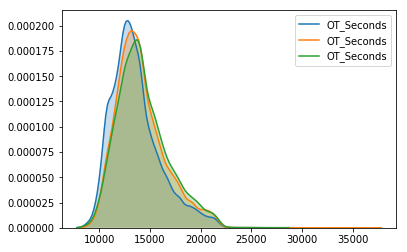

In [236]:
#Distributions for each year
x=Boston2015.OT_Seconds
sb.kdeplot(x, shade=True,cut=0);

y=Boston2016.OT_Seconds
sb.kdeplot(y,shade=True,cut=0);

z=Boston2017.OT_Seconds
sb.kdeplot(z,shade=True,cut=0);
plt.show()

In [231]:
print min(Boston2015.OT_Seconds)
print max(Boston2015.OT_Seconds)

7757
29161
